In [30]:
!pip3 install ucimlrepo

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [32]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
  
# metadf 
print(chronic_kidney_disease.metadf) 
  
# variable information 
print(chronic_kidney_disease.variables) 

df = pd.concat([X,y], axis=1)
df.head()

None
     name     role         type demographic              description  \
0     age  Feature      Integer         Age                     None   
1      bp  Feature      Integer        None           blood pressure   
2      sg  Feature  Categorical        None         specific gravity   
3      al  Feature  Categorical        None                  albumin   
4      su  Feature  Categorical        None                    sugar   
5     rbc  Feature       Binary        None          red blood cells   
6      pc  Feature       Binary        None                 pus cell   
7     pcc  Feature       Binary        None          pus cell clumps   
8      ba  Feature       Binary        None                 bacteria   
9     bgr  Feature      Integer        None     blood glucose random   
10     bu  Feature      Integer        None               blood urea   
11     sc  Feature   Continuous        None         serum creatinine   
12    sod  Feature      Integer        None                

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

Using different variables does a person have Chronic Kidney Disease.

2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [33]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [34]:
float64_columns = df.select_dtypes(
    include=['float64']
    ).columns
float64_columns
scaler = StandardScaler()
df[float64_columns] = scaler.fit_transform(df[float64_columns])

In [35]:
cat_columns = df.select_dtypes(
    include=['object']
    ).columns

for col in cat_columns:
    print(df[col].value_counts(normalize=True))

rbc
normal      0.810484
abnormal    0.189516
Name: proportion, dtype: float64
pc
normal      0.773134
abnormal    0.226866
Name: proportion, dtype: float64
pcc
notpresent    0.893939
present       0.106061
Name: proportion, dtype: float64
ba
notpresent    0.944444
present       0.055556
Name: proportion, dtype: float64
htn
no     0.630653
yes    0.369347
Name: proportion, dtype: float64
dm
no      0.653266
yes     0.344221
\tno    0.002513
Name: proportion, dtype: float64
cad
no     0.914573
yes    0.085427
Name: proportion, dtype: float64
appet
good    0.794486
poor    0.205514
Name: proportion, dtype: float64
pe
no     0.809524
yes    0.190476
Name: proportion, dtype: float64
ane
no     0.849624
yes    0.150376
Name: proportion, dtype: float64
class
ckd       0.620
notckd    0.375
ckd\t     0.005
Name: proportion, dtype: float64


In [36]:
for col in cat_columns:
    df[col] = df[col].astype('category').cat.codes
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.569881,-0.206202,0.481295,1,2,0,0,0,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.098536,-0.818559,NaN,0,1,0,0,0,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-0.878356,-0.308261,NaN,0,2,0,1,0,1,0
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.766953,-0.580420,-0.788961,1,1,0,1,1,1,0
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.432744,-0.376301,-0.104977,0,1,0,0,0,0,0


3. Dataset Overview: Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int8   
 6   pc      400 non-null    int8   
 7   pcc     400 non-null    int8   
 8   ba      400 non-null    int8   
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    int8   
 19  dm      400 non-null    int8   
 20  cad     400 non-null    int8   
 21  appet   400 non-null    int8   
 22  pe

In [38]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,3.910000e+02,3.880000e+02,3.530000e+02,354.000000,351.000000,400.00000,400.000000,400.000000,400.000000,3.560000e+02,...,3.290000e+02,2.940000e+02,2.690000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,9.994847e-17,-2.380684e-16,2.415443e-15,0.000000,0.000000,0.12250,0.485000,0.095000,0.045000,-1.796316e-16,...,1.295823e-16,1.450087e-16,8.452553e-16,0.362500,1.330000,0.080000,0.202500,0.187500,0.147500,0.755000
std,1.001281e+00,1.001291e+00,1.001419e+00,1.001415,1.001428,0.93256,0.759089,0.325946,0.251262,1.001407e+00,...,1.001523e+00,1.001705e+00,1.001864e+00,0.491628,0.506697,0.289499,0.408547,0.397163,0.362038,0.968152
min,-2.885708e+00,-1.936857e+00,-2.173584e+00,-0.752868,-0.410106,-1.00000,-1.000000,-1.000000,-1.000000,-1.591967e+00,...,-3.329218e+00,-2.111312e+00,-2.547777e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-5.530393e-01,-4.733701e-01,-1.297699e+00,-0.752868,-0.410106,-1.00000,0.000000,0.000000,0.000000,-6.193803e-01,...,-7.669527e-01,-6.484596e-01,-7.889609e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.050779e-01,2.583733e-01,4.540705e-01,-0.752868,-0.410106,1.00000,1.000000,0.000000,0.000000,-3.414983e-01,...,1.242700e-01,-1.381622e-01,9.044717e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.590867e-01,2.583733e-01,4.540705e-01,0.727772,-0.410106,1.00000,1.000000,0.000000,0.000000,1.890038e-01,...,6.812843e-01,4.741947e-01,6.767192e-01,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,2.246163e+00,7.575807e+00,1.329955e+00,2.948733,4.145186,1.00000,1.000000,1.000000,1.000000,4.319341e+00,...,1.683910e+00,6.121486e+00,3.217231e+00,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [39]:
df["class"].value_counts()

class
0    248
2    150
1      2
Name: count, dtype: int64

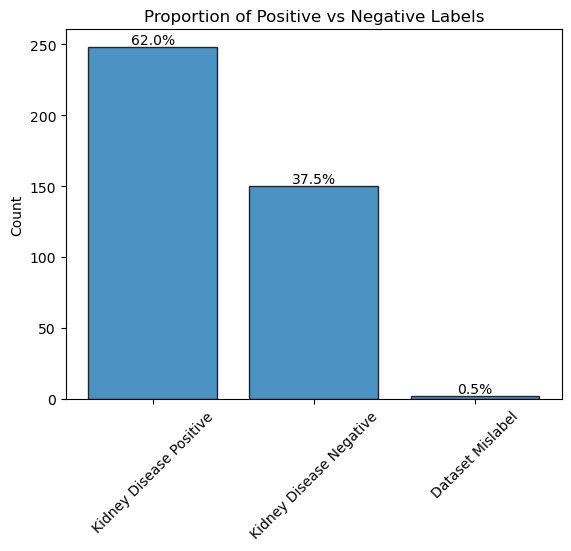

In [40]:
fig, ax = plt.subplots(1, 1)
bar_data = df["class"].value_counts()
ax.bar(range(len(bar_data)), bar_data, edgecolor="black", alpha=0.8)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["Kidney Disease Positive", "Kidney Disease Negative", "Dataset Mislabel"], rotation=45)

for i, count in enumerate(bar_data):
    percentage = count / bar_data.sum() * 100
    ax.text(i, count, f"{percentage:.1f}%", ha="center", va="bottom")
ax.set_ylabel("Count")
ax.set_title("Proportion of Positive vs Negative Labels")
plt.show()

#### Visualizing distribution of continuous variables with Kernel Density Estimation

/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

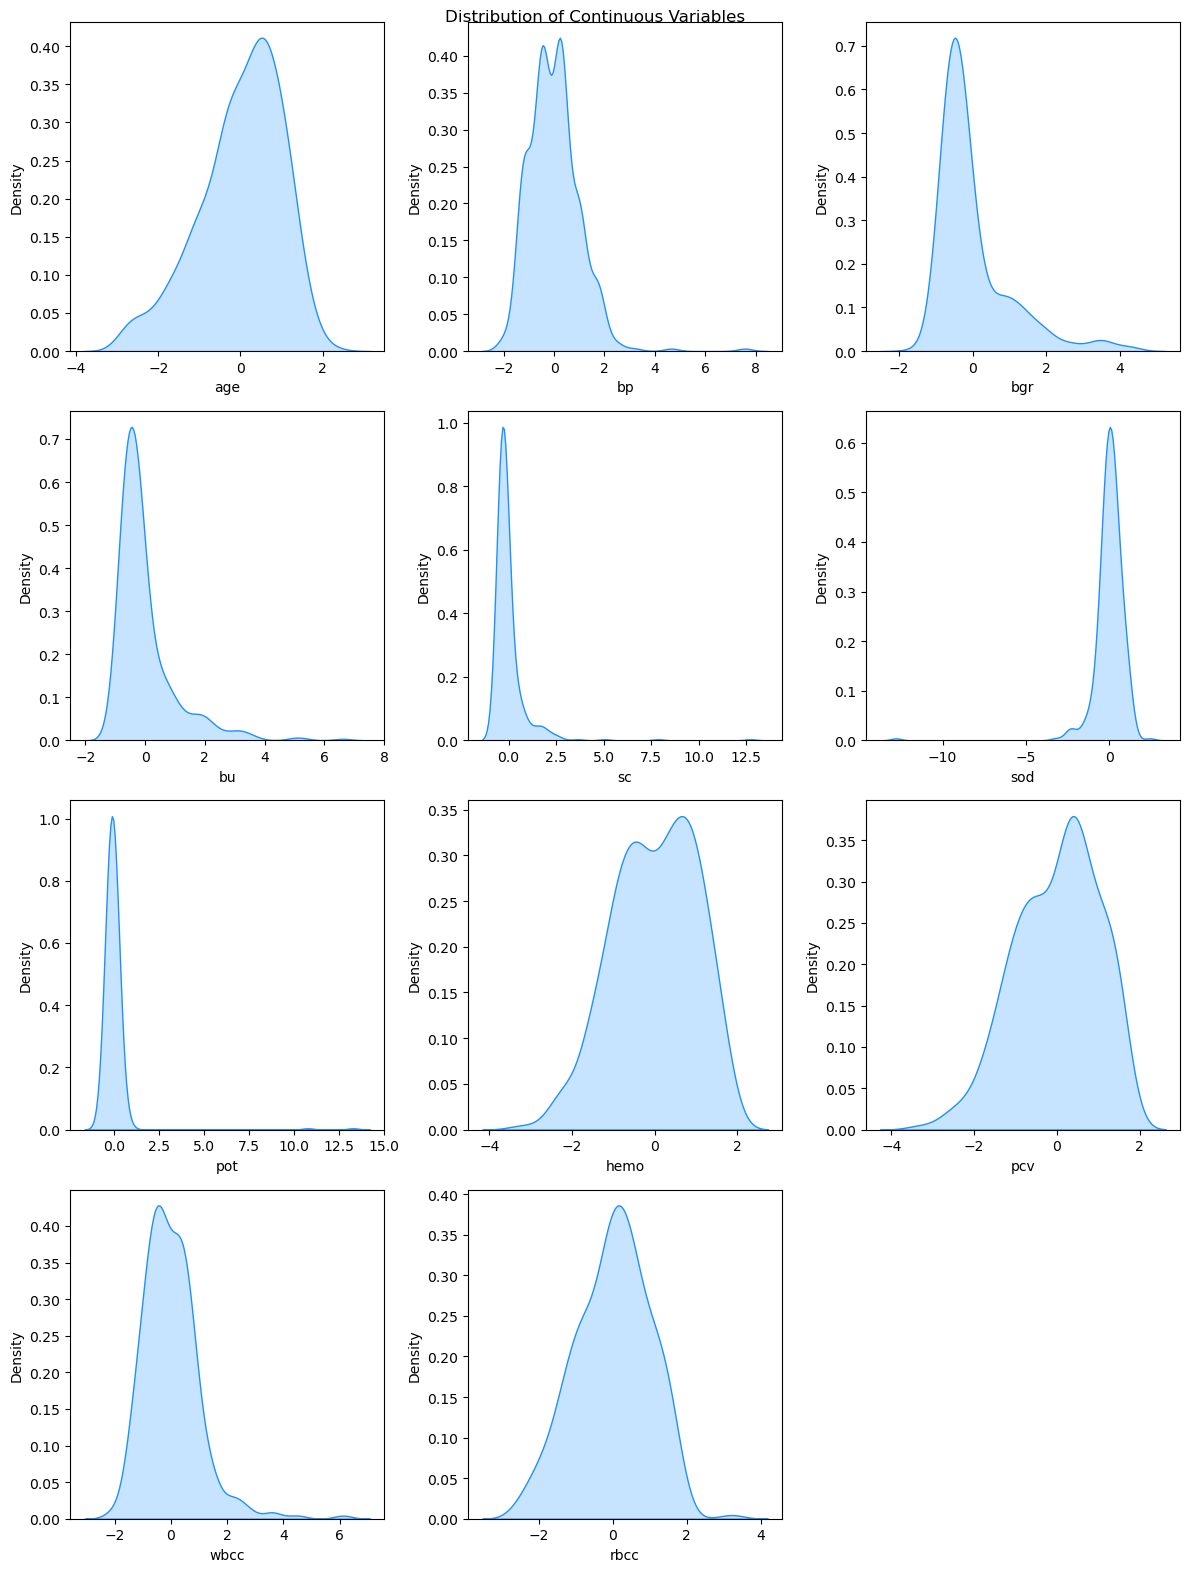

In [58]:
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

num_features = len(num_vars)
num_rows = 4  # Number of rows in the subplot grid
num_cols = 3  # Number of columns in the subplot grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 4 * num_rows))

for i, cont_feature in enumerate(df[num_vars]):
    row = i // num_cols  # Calculate the row index for the subplot
    col = i % num_cols  # Calculate the column index for the subplot

    ax_kde = axes[row, col]

    # Plot KDE for the feature
    sns.kdeplot(df[cont_feature], ax=ax_kde, fill=True, color="dodgerblue")

# Remove empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.suptitle("Distribution of Continuous Variables")
plt.tight_layout()
plt.show()

/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/NoahRipstein/miniconda3/envs/3d_39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN

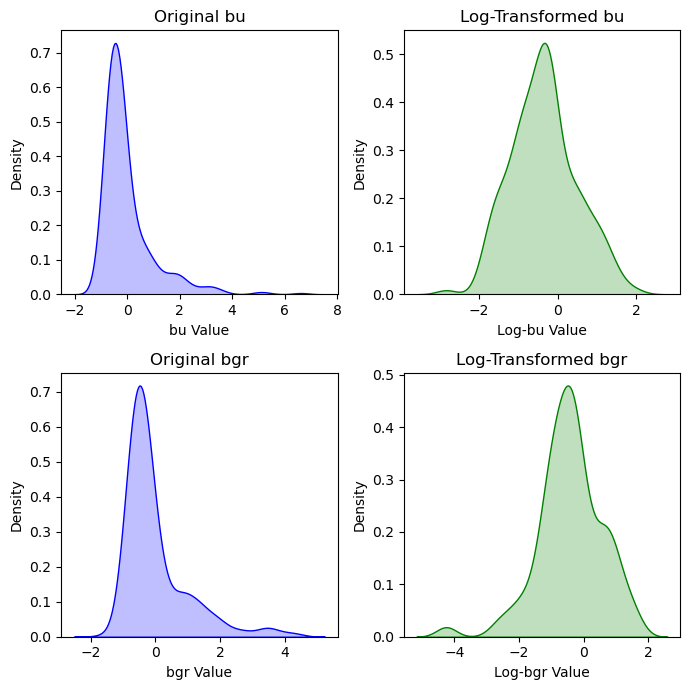

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create a new DataFrame with selected variables and their transformations
data_log_vis = pd.DataFrame({
    'bu': df['bu'],
    'log_bu': np.log(df['bu'] + 1),  # Log transform with handling zero values
    'bgr': df['bgr'],
    'log_bgr': np.log(df['bgr'] + 1)
})

# Variables to plot
variables = ['bu', 'bgr']

# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
axes = axes.flatten()  # Flatten to simplify indexing

for i, var in enumerate(variables):
    # Original Data Plot
    sns.kdeplot(data_log_vis[var], ax=axes[2*i], fill=True, color="blue")
    axes[2*i].set_title(f"Original {var}")
    axes[2*i].set_xlabel(f"{var} Value")
    axes[2*i].set_ylabel("Density")

    # Log-Transformed Data Plot
    sns.kdeplot(data_log_vis[f'log_{var}'], ax=axes[2*i+1], fill=True, color="green")
    axes[2*i+1].set_title(f"Log-Transformed {var}")
    axes[2*i+1].set_xlabel(f"Log-{var} Value")
    axes[2*i+1].set_ylabel("Density")

plt.tight_layout()
plt.show()


Observations:
1. The dataset has an imbalance in the number of kidney disease positive vs negative examples. Our visual exploratory data analysis also revealed that there are two mislabeled variables in the dataset's target column. The column in the dataset should include only "positive" or "negative" Kidney disease status, but there were a few examples with a third label. We discuss this more in the outliers section.
2. Many of the variables look roughly noramlly distributed, except that the blood glucode random and blood urea features are long-tailed. This has implications for feature engineering: we expect that log-transforming these features will make them closer to a normal distribution; this is likely to improve performance on classifiers such as logistic regression. We visualized these variables log-transformed to confirm that they look closer to a normal distribution after the transformation
3. Most variables are continuous, although the specific gravity, albumin and sugar levels are categorical.

4. Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements)

<Axes: >

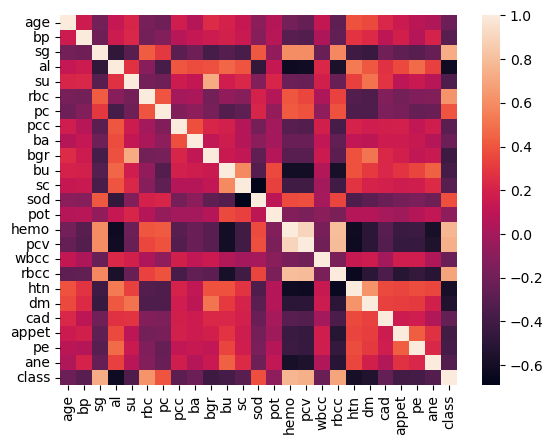

In [ ]:
sns.heatmap(df.corr())

5. Missing Value Analysis and Handling: Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.

In [ ]:
# Missing Value Analysis
missing_values = df.isnull().sum()

print(missing_values)

age        9
bp        12
sg        47
al        46
su        49
rbc        0
pc         0
pcc        0
ba         0
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        0
dm         0
cad        0
appet      0
pe         0
ane        0
class      0
dtype: int64


In [ ]:
# Mean imputer for numerical values and most frequent imputer for categorical values
num_vars = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
cat_vars = ['sg', 'al', 'su']

imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df[num_vars] = imputer_num.fit_transform(df[num_vars])
df[cat_vars] = imputer_cat.fit_transform(df[cat_vars])

For numerical features (age, bp, bgr, bu, sc, sod, pot, hemo, pcv, wbcc, rbcc), we'll use mean imputation.
For categorical features (sg, al, su), we'll use mode imputation.
Binary features (rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane) already have no missing values.

6. Outlier Analysis: Implement your approach for identifying and managing outliers, or pro- vide reasons for not addressing them.

In [ ]:
# I noticed dm has 1s and 2s, so I converted them to 0s and 1s
# Class has 0s and 2s, so I converted them to 0s and 1s
df['dm'] = df['dm'].replace({'2':1, '1':0})
df['class'] = df['class'].replace({2:1})

7. Sub-group Analysis: Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).

8. Data Splitting: Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.

In [ ]:
# Split data into features and target variable
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

9. Classifier Choices: Identify the two classifiers you have chosen and justify your selections.

In [ ]:
# Classifier Choices
rf = RandomForestClassifier()
lr = LogisticRegression()

# Model Training
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Model Evaluation
rf_pred = rf.predict(X_test)
rf_y_prob = rf.predict_proba(X_test)
lr_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)
probT_rf = pd.DataFrame(
    data = {'prob0': rf_y_prob[:,1], 'y_test': y_test}
    )
probT_lr = pd.DataFrame(
    data = {'prob0': lr_y_prob[:,1], 'y_test': y_test}
    )
probT_rf['y_test_pred'] = probT_rf.prob0.map(lambda x: 1 if x>0.5 else 0)
probT_lr['y_test_pred'] = probT_lr.prob0.map(lambda x: 1 if x>0.5 else 0)

10. Performance Metrics: Outline the two metrics for comparing the performance of the classifiers.

In [ ]:
def evaluate(y_test, y_test_pred):
    cm = confusion_matrix(y_test,y_test_pred)
    print('Confusion Matrix : \n', cm)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    print ('Accuracy : ', accuracy)
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity )
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity)
    print(classification_report(y_test, y_test_pred, zero_division=0.0))

print('Random Forest Classifier:\n')
evaluate(probT_rf.y_test, probT_rf.y_test_pred)

print('Logistic Regression Classifier:\n')
evaluate(probT_lr.y_test, probT_lr.y_test_pred)

Random Forest Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Logistic Regression Classifier:

Confusion Matrix : 
 [[70  0]
 [ 0 50]]
Accuracy :  1.0
Sensitivity :  1.0
Specificity :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        50

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



11. Feature Selection/Extraction: Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).

12. Classifier Comparison: Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).

13. Interpretable Classifier Insight: After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).

14. Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).

# Contributions

Jenna: Created/set up repository and jupyter notebook, started working on questions 1-4  
Viransh: References added, started working on questions 5-10
Noah: Finished question 3, added visualizations and discussion of normality/log-transformation

# Github Link

[Github link] (https://github.com/JennaOrvitz/Stats3DA3FinalProject/tree/main)

## References

::: {#refs}
:::